# Sarcasm Dataset

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf


In [2]:
# This code is related to limiting the tensorflow GPU ---------------------------

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
# Loading the json data
# f = open('../News Headlines Dataset for Sarcasm Detection/Sarcasm_Headlines_Dataset.json',)
# json.load(f)

Reading the data through pandas dataframe then converting it into the list ....because i like Pandas :)

In [4]:
# reading the json file
df = pd.read_json('../News Headlines Dataset for Sarcasm Detection/Sarcasm_Headlines_Dataset.json',lines=True)

In [5]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [6]:
df.tail()

,article_link,headline,is_sarcastic
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0
26708,https://www.huffingtonpost.com/entry/gourmet-g...,gourmet gifts for the foodie 2014,0


In [7]:
df.columns

Index(['article_link', 'headline', 'is_sarcastic'], dtype='object')

In [12]:
sentences = df['headline'].values.tolist()
labels = df['is_sarcastic'].values.tolist()

In [13]:
#sentences = list(sentences)
#labels = list(labels)
type(sentences),type(labels)

(list, list)

In [14]:
len(sentences),len(labels)

(26709, 26709)

In [15]:
sentences

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way',
 "advancing the world's women",
 'the fascinating case for eating lab-grown meat',
 'this ceo will send your kids to school, if you work for his company',
 'top snake handler leaves sinking huckabee campaign',
 "friday's morning email: inside trump's presser for the ages",
 'airline passengers tackle man who rushes cockpit in bomb threat',
 'facebook reportedly working on healthcare features and apps',
 "north korea praises trump and urges us voters to reject 'dull hillary'",
 "actually, cnn's jeffrey lord has been 'indefensible' for a while",
 'barcelona holds huge protest in su

In [17]:
training_size = 20000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOv>"
#training_size = 20000

tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok) # object of Tokenizer
tokenizer.fit_on_texts(training_sentences) # fitting on train data for tokenization

word_index = tokenizer.word_index # just checking which word is having which tokens

sequences = tokenizer.texts_to_sequences(training_sentences) # converting into sequences of tokens
training_padded = pad_sequences(sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type) # making equal length

testing_tokenizer = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_tokenizer,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [20]:
# Now lets convert all the final data into numpy array to get to work on Tensorflow 2.x
training_padded = np.array(training_padded)
testing_padded = np.array(testing_padded)

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)



In [22]:
training_padded.shape, testing_padded.shape

((20000, 100), (6709, 100))

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.summary()
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [24]:
hist = model.fit(training_padded,training_labels,epochs=30,validation_data=(testing_padded,testing_labels))

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 [==============================] - 3s 155us/sample - loss: 0.6707 - accuracy: 0.5741 - val_loss: 0.6078 - val_accuracy: 0.7003
Epoch 2/30
20000/20000 [==============================] - 2s 112us/sample - loss: 0.4625 - accuracy: 0.8159 - val_loss: 0.4026 - val_accuracy: 0.8275
Epoch 3/30
20000/20000 [==============================] - 2s 110us/sample - loss: 0.3289 - accuracy: 0.8707 - val_loss: 0.3600 - val_accuracy: 0.8524
Epoch 4/30
20000/20000 [==============================] - 2s 114us/sample - loss: 0.2740 - accuracy: 0.8950 - val_loss: 0.3463 - val_accuracy: 0.8566
Epoch 5/30
20000/20000 [==============================] - 2s 116us/sample - loss: 0.2388 - accuracy: 0.9067 - val_loss: 0.3482 - val_accuracy: 0.8501
Epoch 6/30
20000/20000 [==============================] - 2s 112us/sample - loss: 0.2098 - accuracy: 0.9207 - val_loss: 0.3460 - val_accuracy: 0.8547
Epoch 7/30
20000/20000 [===========================

In [25]:
print(training_sentences[2])
print(labels[2])

mom starting to fear son's web series closest thing she will have to grandchild
1


In [26]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


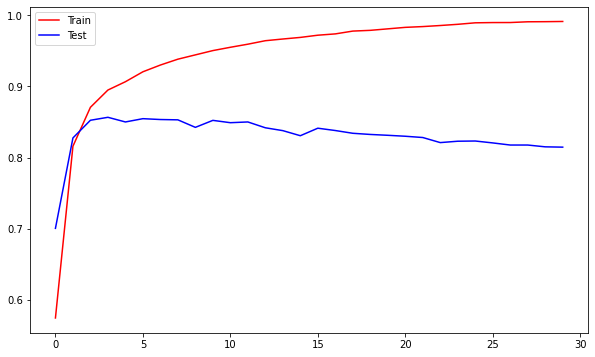

In [27]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'b')
plt.legend(['Train','Test'],loc='best')

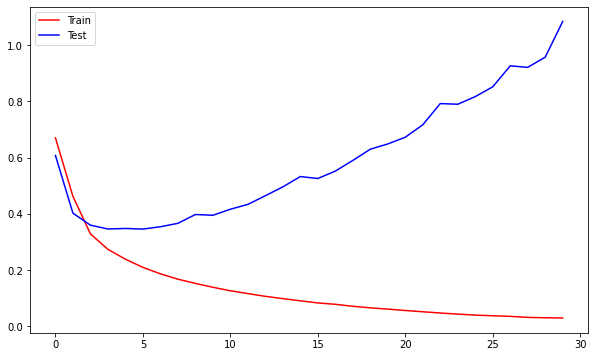

In [28]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['val_loss'],'b')
plt.legend(['Train','Test'],loc='best')

# Predictions

In [32]:
sentence = ['granny starting to fear spiders in the farden might be real','game of thrones season finale showing this sunday night']

# preprocessing the text
sequence = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequence,maxlen=max_length,padding=padding_type,truncating=trunc_type)

#predicting the text
print((model.predict(padded)))

[[3.054159e-04]
 [6.449012e-06]]
